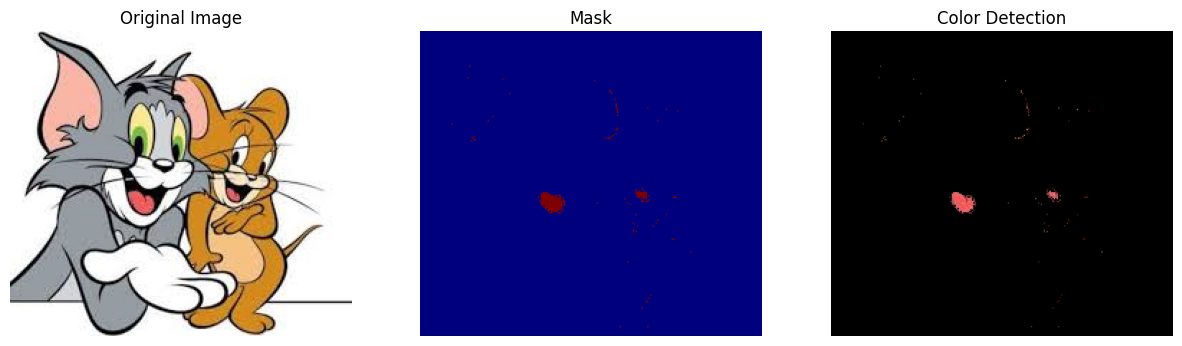

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread("/content/tomjerry.jpeg")

# Check if image is loaded correctly
if image is None:
    print("Error: Image not found!")
    exit()

# Convert to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define color range for Red (two ranges due to HSV circular nature)
lower_red1 = np.array([0, 120, 70])
upper_red1 = np.array([10, 255, 255])

lower_red2 = np.array([170, 120, 70])
upper_red2 = np.array([180, 255, 255])

# Create masks for both red ranges and combine them
mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
final_mask = cv2.bitwise_or(mask1, mask2)

# Bitwise-AND mask and original image
result = cv2.bitwise_and(image, image, mask=final_mask)

# Convert from BGR to RGB for Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

# Display results using Matplotlib
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(image_rgb)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(final_mask, cmap="jet")  # Better visualization with 'jet' colormap
ax[1].set_title("Mask")
ax[1].axis("off")

ax[2].imshow(result_rgb)
ax[2].set_title("Color Detection")
ax[2].axis("off")

plt.show()


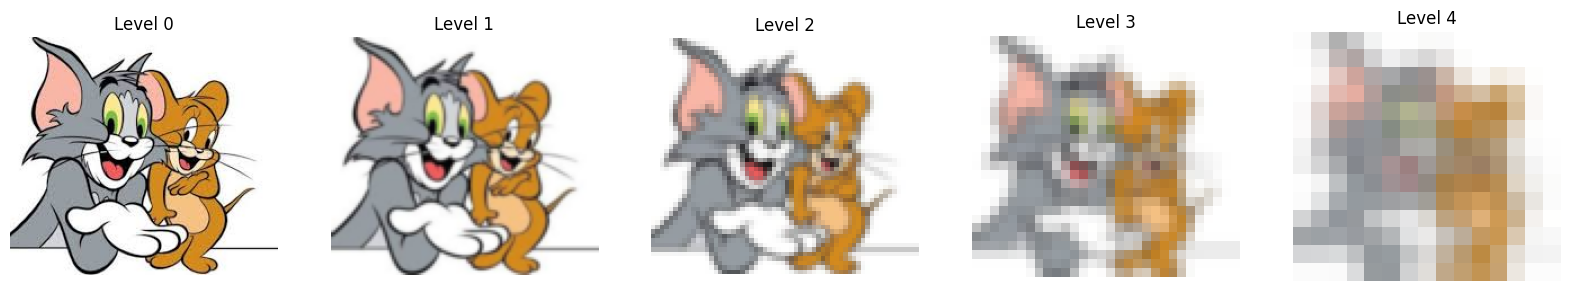

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load image
image = cv2.imread("/content/tomjerry.jpeg")

# Check if image is loaded correctly
if image is None:
    print("Error: Image not found!")
    exit()

# Convert to RGB for visualization
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create T-pyramid (Gaussian Pyramid)
pyramid_levels = [image_rgb]
for i in range(4):  # Create 4 levels
    image_rgb = cv2.pyrDown(image_rgb)
    pyramid_levels.append(image_rgb)

# Display Pyramid Levels
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
for i, img in enumerate(pyramid_levels):
    ax[i].imshow(img)
    ax[i].set_title(f"Level {i}")
    ax[i].axis("off")

plt.show()


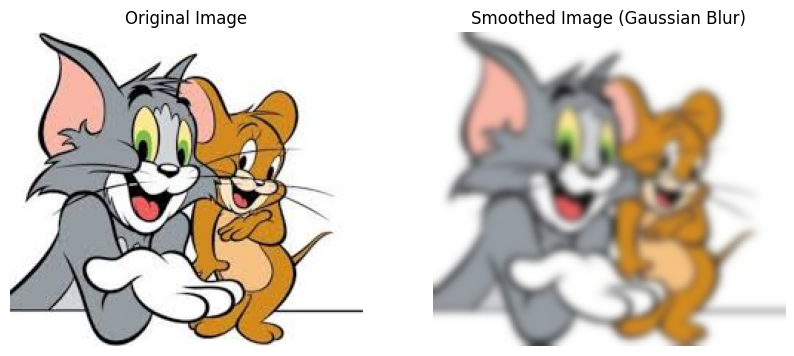

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv2.imread("/content/tomjerry.jpeg")

# Check if image is loaded correctly
if image is None:
    print("Error: Image not found!")
    exit()

# Convert to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply Gaussian Blur
blurred = cv2.GaussianBlur(image_rgb, (15, 15), 0)

# Display images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image_rgb)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(blurred)
ax[1].set_title("Smoothed Image (Gaussian Blur)")
ax[1].axis("off")

plt.show()


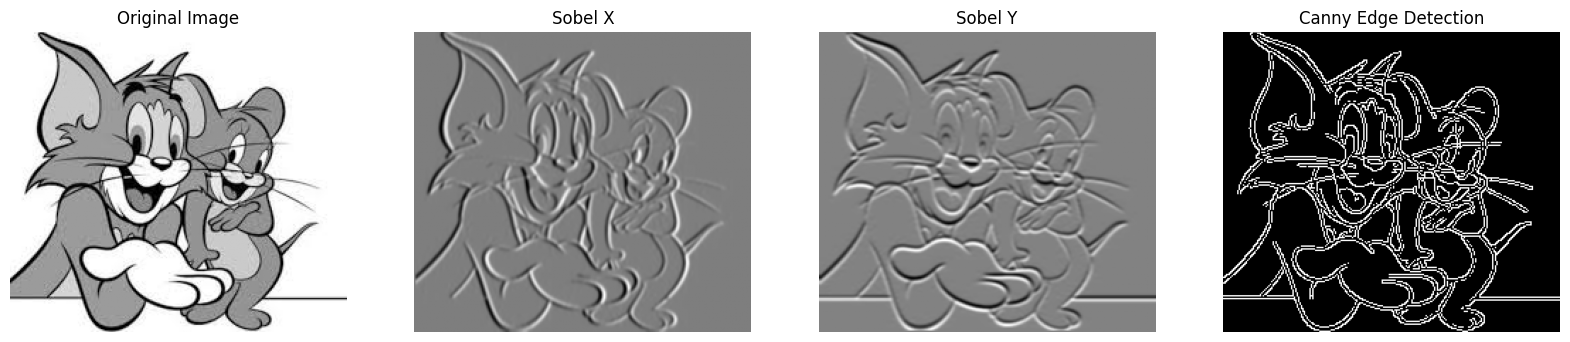

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv2.imread("/content/tomjerry.jpeg", cv2.IMREAD_GRAYSCALE)

# Check if image is loaded correctly
if image is None:
    print("Error: Image not found!")
    exit()

# Apply Sobel filter
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)

# Apply Canny edge detection
canny = cv2.Canny(image, 100, 200)

# Display images
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

ax[0].imshow(image, cmap="gray")
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(sobel_x, cmap="gray")
ax[1].set_title("Sobel X")
ax[1].axis("off")

ax[2].imshow(sobel_y, cmap="gray")
ax[2].set_title("Sobel Y")
ax[2].axis("off")

ax[3].imshow(canny, cmap="gray")
ax[3].set_title("Canny Edge Detection")
ax[3].axis("off")

plt.show()


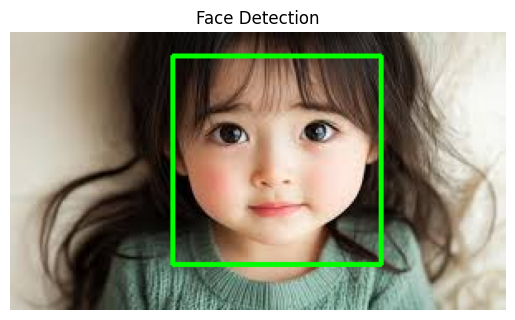

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Load image
image = cv2.imread("face.jpeg")

# Check if image is loaded correctly
if image is None:
    print("Error: Image not found!")
    exit()

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Convert to RGB for visualization
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display result
plt.imshow(image_rgb)
plt.title("Face Detection")
plt.axis("off")
plt.show()
